## This script contains the following points:¶

1. Import libraries and data sets.
2. Examine data sets and drop nonpertinent columns.
3. Split data into training and testing sets.
4. Run k-nearest neighbors model on the data with weather station observations as X data and the pleasant weather database as the y data.
5. Plot multilabel confusion matrix with markdown comments on parameters and accuracy of the training and testing data based on the number of neighbors.
6. Plot confusion matrix for final training and testing scenarios.

### 1. Import libraries and data sets.

In [71]:
# Import libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

In [2]:
# Establish path.

path = r'/Users/juliareeves/Documents/WorkWorkWork/CareerFoundry/Machine Learning Python 1'
path

'/Users/juliareeves/Documents/WorkWorkWork/CareerFoundry/Machine Learning Python 1'

In [3]:
# Import scaled mean temperatures data set.

df_meantemps = pd.read_csv(os.path.join(path, 'ClimateWins', 'Data Sets', 'DataSet_meantemps_scaled.csv'), index_col = 0)

In [4]:
# Import pleasant weather answers data set.

df_pleasantweather = pd.read_csv(os.path.join(path, 'ClimateWins', 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

### 2. Examine data sets and drop nonpertinent columns.

In [5]:
# Examine temperature data.

df_meantemps

,DATE,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
0,1960-01-01,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.927601,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-1.280450,-0.124331,-0.391072,-0.257321,-0.668215
1,1960-01-02,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.825294,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.539569,-0.650834,-0.415953,-0.335759,-0.548046
2,1960-01-03,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.940389,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.876333,-0.650834,-0.615003,-0.210258,-0.067372
3,1960-01-04,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-1.042696,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.775304,-0.943336,-0.764290,-0.069069,-0.998679
4,1960-01-05,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.978754,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.926848,-0.621584,-0.503037,-0.037694,-1.509396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,2022-10-27,0.747959,0.628750,-0.005167,0.898267,1.042841,0.440753,0.906865,-0.005705,0.481853,1.268193,0.683127,0.664244,0.395898,-0.000746,0.826301,0.517090,1.295755,-0.007287
22946,2022-10-28,0.856604,0.367720,-0.005167,0.945734,1.278467,0.466330,0.802037,-0.005705,0.263891,1.313202,0.561815,0.890456,0.541516,-0.000746,1.074927,0.641496,1.358505,-0.007287
22947,2022-10-29,0.856604,0.083991,-0.005167,0.914089,1.101748,0.786039,0.924336,-0.005705,0.300218,1.208181,0.548336,1.053832,0.395898,-0.000746,1.221178,0.716139,1.405568,-0.007287
22948,2022-10-30,0.680055,0.265577,-0.005167,0.692578,0.880848,0.376811,0.697210,-0.005705,0.397090,0.923123,0.103526,0.689378,-0.065226,-0.000746,1.235803,0.019467,0.668249,-0.007287


In [6]:
# Examine pleasant weather data.

df_pleasantweather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df_pleasantweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   DATE                         22950 non-null  int64
 1   BASEL_pleasant_weather       22950 non-null  int64
 2   BELGRADE_pleasant_weather    22950 non-null  int64
 3   BUDAPEST_pleasant_weather    22950 non-null  int64
 4   DEBILT_pleasant_weather      22950 non-null  int64
 5   DUSSELDORF_pleasant_weather  22950 non-null  int64
 6   HEATHROW_pleasant_weather    22950 non-null  int64
 7   KASSEL_pleasant_weather      22950 non-null  int64
 8   LJUBLJANA_pleasant_weather   22950 non-null  int64
 9   MAASTRICHT_pleasant_weather  22950 non-null  int64
 10  MADRID_pleasant_weather      22950 non-null  int64
 11  MUNCHENB_pleasant_weather    22950 non-null  int64
 12  OSLO_pleasant_weather        22950 non-null  int64
 13  SONNBLICK_pleasant_weather   22950 non-null  i

In [8]:
# Print list of cities in pleasant weather data.

df_pleasantweather.columns

Index(['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')

In [9]:
# Subset temperature data to only include cities in pleasant weather data.

df_temps_subset = df_meantemps[['BASEL_temp_mean', 'BELGRADE_temp_mean',
       'BUDAPEST_temp_mean', 'DEBILT_temp_mean',
       'DUSSELDORF_temp_mean', 'HEATHROW_temp_mean',
       'KASSEL_temp_mean', 'LJUBLJANA_temp_mean',
       'MAASTRICHT_temp_mean', 'MADRID_temp_mean',
       'MUNCHENB_temp_mean', 'OSLO_temp_mean',
       'SONNBLICK_temp_mean', 'STOCKHOLM_temp_mean',
       'VALENTIA_temp_mean']].copy()
df_temps_subset

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-0.124331,-0.391072,-0.668215
1,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.650834,-0.415953,-0.548046
2,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.650834,-0.615003,-0.067372
3,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.943336,-0.764290,-0.998679
4,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.621584,-0.503037,-1.509396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0.747959,0.628750,-0.005167,0.898267,1.042841,0.906865,-0.005705,0.481853,1.268193,0.683127,0.664244,0.395898,0.826301,0.517090,-0.007287
22946,0.856604,0.367720,-0.005167,0.945734,1.278467,0.802037,-0.005705,0.263891,1.313202,0.561815,0.890456,0.541516,1.074927,0.641496,-0.007287
22947,0.856604,0.083991,-0.005167,0.914089,1.101748,0.924336,-0.005705,0.300218,1.208181,0.548336,1.053832,0.395898,1.221178,0.716139,-0.007287
22948,0.680055,0.265577,-0.005167,0.692578,0.880848,0.697210,-0.005705,0.397090,0.923123,0.103526,0.689378,-0.065226,1.235803,0.019467,-0.007287


In [10]:
# Drop DATE column from pleasant weather data.

df_pleasant_subset = df_pleasantweather.drop(['DATE'], axis=1)
df_pleasant_subset

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 3. Split data into training and testing sets.

In [23]:
# Define X value.

X = df_temps_subset

In [24]:
# Define y value.

y = df_pleasant_subset

In [25]:
# Split data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


### 4. Run k-nearest neighbors model on the data with weather station observations as X data and the pleasant weather database as the y data.

In [31]:
# Run the model with neighbors equal to 1 to 4, test the accuracy.

k_range = np.arange(1,5)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, y_train)
    test_acc[i] = knn.score(X_test, y_test)

i - 0
k - [1 2 3 4]
i - 1
k - [1 2 3 4]
i - 2
k - [1 2 3 4]
i - 3
k - [1 2 3 4]


In [33]:
# Create a dataframe of KNN and accuracy.

df_knn = pd.DataFrame({"N Neighbors": k_range, "Train Accuracy": train_acc, "Test Accuracy": test_acc})
df_knn

,N Neighbors,Train Accuracy,Test Accuracy
0,1,1.000000,0.408853
1,2,0.536951,0.422970
2,3,0.527016,0.425758
3,4,0.485882,0.434298


<function matplotlib.pyplot.show(close=None, block=None)>

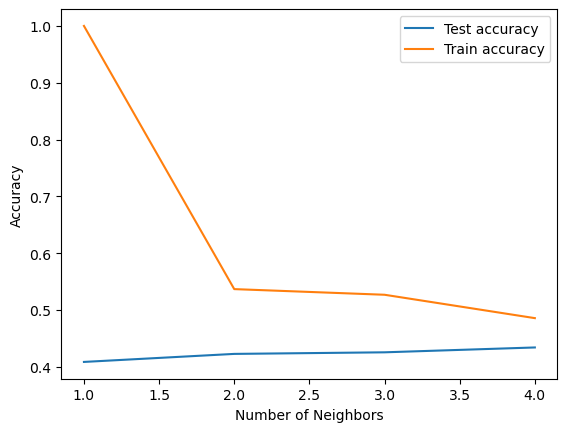

In [32]:
# Plot the relationship between number of neighbors and accuracy.

plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

### 5. Plot multilabel confusion matrix with markdown comments on parameters and accuracy of the training and testing data based on the number of neighbors.

In [29]:
# Define locations.

locations = list({x.split("_")[0] for x in df_temps_subset.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

[[4040  298]
 [ 703  697]]

[[3360  416]
 [ 661 1301]]

[[3513  387]
 [ 622 1216]]

[[4416  221]
 [ 612  489]]

[[4245  262]
 [ 708  523]]

[[4303  267]
 [ 683  485]]

[[4634  181]
 [ 505  418]]

[[3851  344]
 [ 635  908]]

[[4313  249]
 [ 629  547]]

[[2822  346]
 [ 496 2074]]

[[4305  241]
 [ 613  579]]

[[4737  142]
 [ 512  347]]

[[5738]]

[[4586  180]
 [ 518  454]]

[[5431   31]
 [ 247   29]]



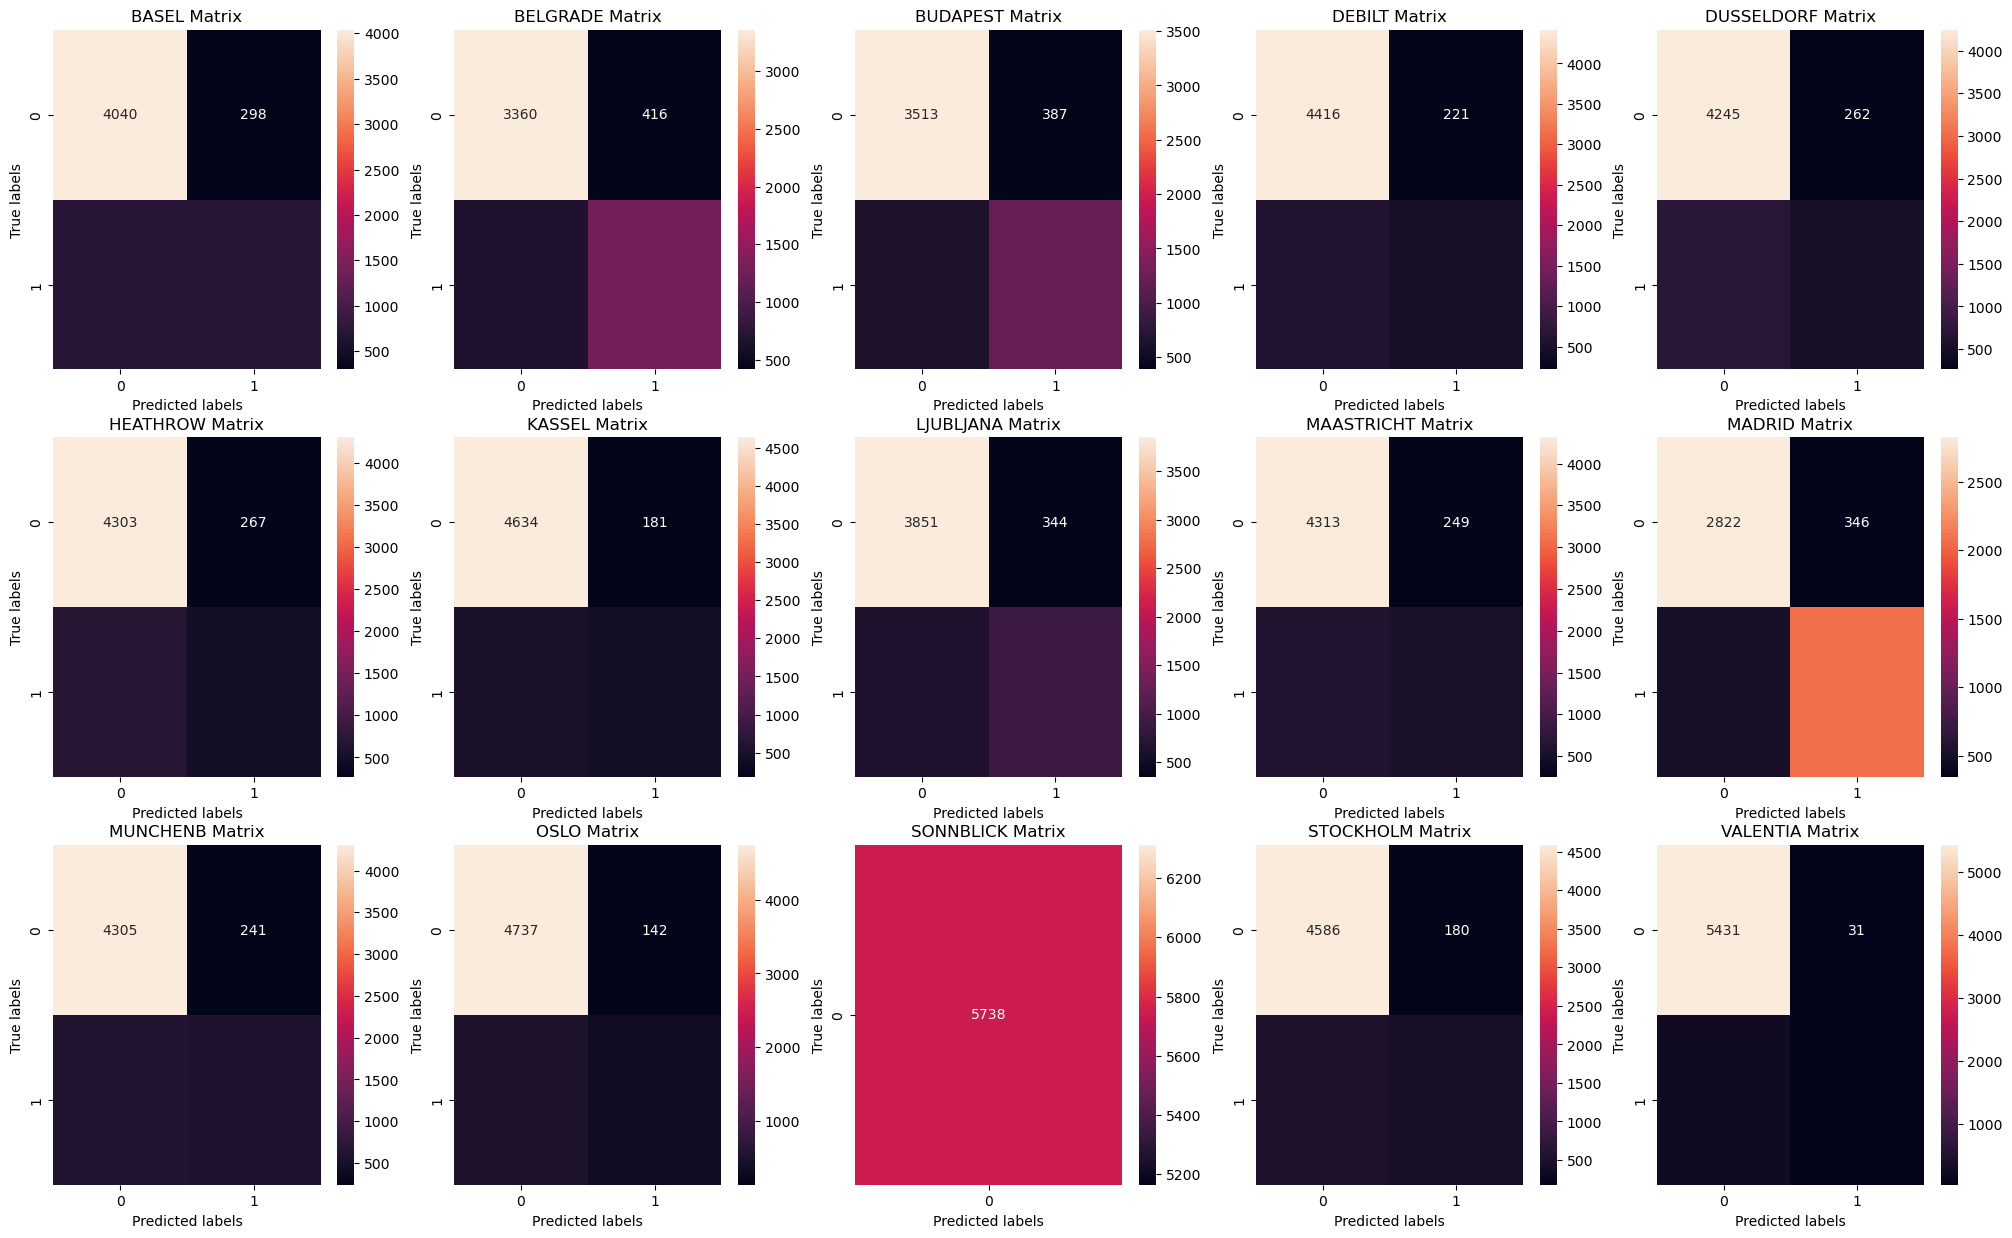

In [78]:
# Define pleasant weather key.

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix');
        count+=1
        
        print(cm)
        print()

Parameters are the number of neighbors. Based on the number of nearest neighbors, the test accuracy indicates overfitting with one nearest neighbor and significantly drops with two neighbors. The train accuracy increases from 1 to 4 neighbors.

### 6. Plot confusion matrix for final training and testing scenarios.

In [36]:
# Examine y_test set.

y_test

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
19955,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
7729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10815,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0
3125,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
18985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19650,1,1,0,0,1,0,0,1,1,0,1,0,0,0,0
7946,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3579,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0
14681,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [62]:
# Reshape y_test set for confusion matrix.

y_test_flat = y_test.values.reshape(-1,1)

In [63]:
# Check y_test_flat shape.

y_test_flat.shape

(86070, 1)

In [64]:
# Reshape y_pred.

y_pred_flat = y_pred.reshape(-1,1)

In [65]:
# Check shape of y_pred_flat.

y_pred_flat.shape

(86070, 1)

In [79]:
# Check output of y_pred_flat.

y_pred_flat

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

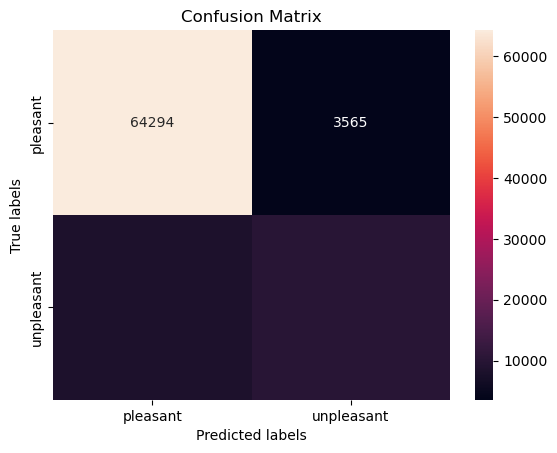

In [80]:
# Create confusion matrix based on the last "k" in the sequence.

ax= plt.subplot()

cm = confusion_matrix(y_test_flat, y_pred_flat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [82]:
# Print confusion matrix label annotations.

cm

array([[64294,  3565],
       [ 8144, 10067]])

In [83]:
# Print classification report on y_test_flat.

print(classification_report(y_test_flat, y_pred_flat))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     67859
           1       0.74      0.55      0.63     18211

    accuracy                           0.86     86070
   macro avg       0.81      0.75      0.77     86070
weighted avg       0.86      0.86      0.86     86070

